In [20]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import translator

In [62]:
# global parameters for plots
plt.style.use("fast")
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (4.45, 3)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff", dpi=600)
    fig.savefig("../figures/" + fig_name + ".png", dpi=600)

In [21]:
# to communicate with google spreadsheet...
import gspread
from gspread_dataframe import get_as_dataframe
from gspread_dataframe import set_with_dataframe
from google.oauth2 import service_account # based on google-auth library

# establish connection with gogglesheets...
file_data = json.load(open("../../ServiceAccountsKey.json", "r"))
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
PIPA_data = gc.open_by_url("https://docs.google.com/spreadsheets/d/1rV4t0_UV_wcx--UAHVwkqB8Wa_5n9mnpV05yGG1OHqk/edit?usp=sharing")

In [22]:
keywords = ['λυπέω',
            'λυπηρός',
            'λύπη',
            'ἄλγος',
            'ἄλγημα',
            'ἀλγέω',
            'ὀδύνη',
            'ὀδυνάω',
            'πονέω',
            'πόνος']

In [23]:
[f for f in os.listdir("../data/") if "keyed_vectors" in f]

['keyed_vectors_full.wv',
 'keyed_vectors_excl_arist.wv',
 'keyed_vectors_excl_aristplato.wv',
 'keyed_vectors_excl_subcorpora.wv',
 'keyed_vectors_subcorpora.wv',
 'keyed_vectors_excl_hipp.wv',
 'keyed_vectors_excl_plato.wv']

In [24]:
vectors_dict = {}
for filename in [f for f in os.listdir("../data/") if "keyed_vectors" in f]:
    vectors_dict[filename.partition(".")[0]] = KeyedVectors.load("../data/" + filename)

In [25]:
print(list(vectors_dict.keys()))

['keyed_vectors_full', 'keyed_vectors_excl_arist', 'keyed_vectors_excl_aristplato', 'keyed_vectors_excl_subcorpora', 'keyed_vectors_subcorpora', 'keyed_vectors_excl_hipp', 'keyed_vectors_excl_plato']


In [26]:
most_sim_dfs_dict = {}
for item in vectors_dict.items():
    keyed_vectors = item[1]
    mostsimilar_dict = {}
    for keyword in keywords:
        most_similar = [tup[0] + " ({})".format(str(np.round(tup[1], 2))) for tup in keyed_vectors.most_similar(keyword)]
        mostsimilar_dict[keyword] = most_similar
    mostsimilar_df = pd.DataFrame(mostsimilar_dict)
    most_sim_dfs_dict[item[0].replace("keyed_vectors", "most_similar")] = mostsimilar_df

In [27]:
for key in most_sim_dfs_dict.keys():
    print(key)

most_similar_full
most_similar_excl_arist
most_similar_excl_aristplato
most_similar_excl_subcorpora
most_similar_subcorpora
most_similar_excl_hipp
most_similar_excl_plato


In [28]:
most_sim_dfs_dict["most_similar_full"]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,χαίρω (0.51),λύπη (0.58),λυπηρός (0.58),τάλας (0.66),ἰξύα (0.75),ὀδυνάω (0.52),θέρμη (0.66),μετάφρενον (0.7),ταλαιπωρέω (0.6),πλησμονή (0.54)
1,εὐφραίνω (0.5),ἡδύς (0.58),ἡδονή (0.57),μέλεος (0.6),ὀδυνάω (0.67),ἀλγεινός (0.49),ἄλγημα (0.65),ἰξύα (0.69),πόνος (0.47),ταλαιπωρία (0.5)
2,ἀκόλαστος (0.49),ἀλγεινός (0.52),ἐπιθυμία (0.57),δύστηνος (0.6),ὑποχόνδριος (0.67),δακρύω (0.48),δίψα (0.63),ὑποχόνδριος (0.69),γυμνάζω (0.44),πονέω (0.47)
3,ἥδομαι (0.49),βλαβερός (0.51),σωματικός (0.53),πότμος (0.57),φρικώδης (0.67),ψαύω (0.46),βήξ (0.62),ἄλγημα (0.67),ἰσχναίνω (0.42),ἀλγηδών (0.46)
4,ἄχθομαι (0.46),ἀηδής (0.48),ἀκολασία (0.51),οἰκτρός (0.56),θέρμη (0.67),βαρύνω (0.46),στραγγουρία (0.61),κενεών (0.65),ταλαιπωρία (0.42),εὐεξία (0.46)
5,δυσχερής (0.46),συζάω (0.47),ἀλγηδών (0.48),πῆμα (0.56),ὀσφῦς (0.67),νείαιρα (0.44),νείαιρα (0.61),ὕφαιμος (0.64),εὐεξία (0.42),ἄλγημα (0.41)
6,λυπηρός (0.46),λυπέω (0.46),θυμός (0.48),τλήμων (0.54),τράχηλος (0.66),παραφρονέω (0.43),ἰξύα (0.58),βουβών (0.64),βαρύνω (0.41),καῦμα (0.41)
7,ἀπολαύω (0.45),ἀπολαύω (0.45),ἐγκράτεια (0.47),τλάω (0.54),κενεών (0.65),φρίκη (0.43),κενεών (0.57),πλευρόν (0.64),διαπονέω (0.41),ἐπίπονος (0.4)
8,κέρδος (0.45),ἐπιθυμία (0.45),Ἀφροδίσιος (0.47),στένω (0.53),ὀδύνη (0.65),ἰξύα (0.42),σπασμός (0.56),ὀδυνώδης (0.63),κουφίζω (0.4),γυμνάσιον (0.4)
9,ἀγανακτέω (0.45),παρουσία (0.44),φθόνος (0.47),πόθος (0.53),βουβών (0.64),ὑποχόνδριος (0.42),φλεγμονή (0.56),νείαιρα (0.63),παραμένω (0.36),φῦσα (0.39)


In [30]:
set_with_dataframe(PIPA_data.add_worksheet("most_similar_full", 1,1), most_sim_dfs_dict["most_similar_full"])

In [31]:
most_sim_dfs_dict["most_similar_subcorpora"]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,ἥδομαι (0.62),ἀλγεινός (0.72),λυπηρός (0.62),κλίνω (0.7),ἰξύα (0.79),ὀδυνάω (0.59),ἄλγημα (0.69),μετάφρενον (0.78),βαρύνω (0.61),πλησμονή (0.66)
1,εὐφραίνω (0.62),ἡδύς (0.65),ἐπιθυμία (0.6),ἄλγημα (0.68),στέρνον (0.78),ψαύω (0.58),νείαιρα (0.67),στέρνον (0.77),ταλαιπωρέω (0.58),ταλαιπωρία (0.61)
2,χαίρω (0.6),λύπη (0.62),ἡσσάομαι (0.59),κενεών (0.67),κενεών (0.78),δακρύω (0.58),θέρμη (0.64),ἰξύα (0.76),λεπτύνω (0.58),περίπατος (0.55)
3,ἀνάξιος (0.57),ἀηδής (0.59),ἀλγηδών (0.58),ὀσφῦς (0.66),φρικώδης (0.78),ὀσφῦς (0.58),δίψα (0.64),σπάω (0.74),ἰσχναίνω (0.55),φῦσα (0.53)
4,ὀρέγω (0.57),παρουσία (0.59),ἀκολασία (0.58),νείαιρα (0.64),τράχηλος (0.77),μετάφρενον (0.56),ἰξύα (0.62),ἄλγημα (0.74),προίημι (0.55),γυμνάσιον (0.51)
5,ὀργίζω (0.57),ἀγαπητός (0.59),ὀργή (0.57),μέτωπον (0.64),ὑποχόνδριος (0.76),βαρύνω (0.55),βήξ (0.61),ὕφαιμος (0.73),παραμένω (0.53),εὐεξία (0.5)
6,θαρσέω (0.55),ἡσσάομαι (0.56),φόβος (0.57),ὑποχόνδριος (0.63),μετάφρενον (0.76),ἄλγημα (0.54),στραγγουρία (0.61),βήσσω (0.72),προσίημι (0.52),ὀξύτης (0.49)
7,ἐλπίζω (0.55),ὀρέγω (0.55),ἔλεος (0.57),τάσις (0.63),νῶτον (0.75),χῶρος (0.53),ὀσφῦς (0.6),βουβών (0.72),ταλαιπωρία (0.52),δρόμος (0.49)
8,πεινάω (0.55),ἀπαλλαγή (0.55),σωματικός (0.56),πυρή (0.63),βουβών (0.74),ὑποχόνδριος (0.53),μετάφρενον (0.6),κενεών (0.72),ὀδυνάω (0.51),ταραχή (0.48)
9,ἀκόλαστος (0.55),σωματικός (0.54),Ἀφροδίσιος (0.56),ἰξύα (0.63),ὀδυνάω (0.74),κλίνω (0.53),βληχρός (0.59),σφαγή (0.72),ὀσφῦς (0.51),θόρυβος (0.48)


In [32]:
most_sim_dfs_dict["most_similar_excl_subcorpora"]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,διάκειμαι (0.49),πενία (0.57),ἔρως (0.62),ἀλγεινός (0.72),βήσσω (0.77),ἐλεεινός (0.62),ἧπαρ (0.83),φρίκη (0.73),ταλαιπωρέω (0.57),μόχθος (0.47)
1,πλησιάζω (0.48),ἔρως (0.56),ἄλγος (0.6),ἄχος (0.71),πεμπταῖος (0.74),ἀηδής (0.6),κλείς (0.81),φυράω (0.72),γυμνάζω (0.57),πονέω (0.45)
2,ἀτυχέω (0.47),ἀκρατής (0.56),πλησμονή (0.59),οἰκτρός (0.7),ἀντίφασις (0.73),σχέτλιος (0.58),τέγγω (0.8),κλείς (0.72),μέτριος (0.48),ἀλκή (0.45)
3,ἄχθομαι (0.47),πόθος (0.56),πόθος (0.56),πόθος (0.69),ἔνστασις (0.73),πάθημα (0.58),στάζω (0.79),χολή (0.71),δαπανάω (0.47),βίοτος (0.45)
4,ὠφελέω (0.46),ἀλγεινός (0.53),χολή (0.56),πῆμα (0.66),κάραβος (0.72),ἀλγεινός (0.58),μυελός (0.78),συγκάμπτω (0.71),πόνος (0.45),ὄλβος (0.44)
5,ταλαιπωρέω (0.46),λύπη (0.51),θυμός (0.54),καρδία (0.66),ἔμπυος (0.71),οἰκτρός (0.57),ἐκχέω (0.78),πυρέσσω (0.71),ἐκπονέω (0.45),ἄσκησις (0.43)
6,ἀγανακτέω (0.45),ταλαίπωρος (0.51),ἡδονή (0.53),δεῖμα (0.65),φλεγμαίνω (0.71),θυμόω (0.57),πλευρόν (0.78),ἧπαρ (0.71),ἐλλείπω (0.45),φόβος (0.42)
7,σύνοιδα (0.45),ἀλγέω (0.5),αἰδώς (0.53),τάλας (0.65),κύμινον (0.71),κλύω (0.57),φόνιος (0.77),σπασμός (0.69),κατανοέω (0.44),αἰών (0.4)
8,δυσχεραίνω (0.45),ἐπίπονος (0.5),θράσος (0.53),μέλεος (0.64),τριάς (0.71),ἄλγος (0.55),τήκω (0.77),ῥινόν (0.69),ὠφελέω (0.44),θάρσος (0.4)
9,θρασύς (0.44),ὀνίνημι (0.5),ἀλγεινός (0.52),δύστηνος (0.63),ἄτομος (0.71),δακρύω (0.55),ἰός (0.77),πτῶσις (0.69),ἄσκησις (0.42),πόθος (0.4)


In [33]:
most_sim_dfs_dict["most_similar_excl_aristplato"]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,διάκειμαι (0.54),πενία (0.56),ἔρως (0.55),πόθος (0.66),τράχηλος (0.78),βαρύνω (0.54),ἄλγημα (0.71),μετάφρενον (0.79),ταλαιπωρέω (0.65),ταλαιπωρία (0.51)
1,πλησιάζω (0.53),δουλεύω (0.52),ἐπιθυμία (0.52),δύστηνος (0.65),ἰξύα (0.75),ὀδυνάω (0.52),δίψα (0.68),βουβών (0.75),γυμνάζω (0.52),πλησμονή (0.51)
2,εὐφραίνω (0.5),φθονέω (0.51),παιδικός (0.51),τάλας (0.65),ὑποχόνδριος (0.73),ὑποχόνδριος (0.5),βήξ (0.68),ὑποχόνδριος (0.74),ταλαιπωρία (0.48),βάρος (0.44)
3,ἄχθομαι (0.49),εὐφραίνω (0.5),ἄλγος (0.5),πῆμα (0.64),ὀσφῦς (0.72),οὖς (0.48),θέρμη (0.67),ἰξύα (0.73),ἰσχναίνω (0.45),φῦσα (0.42)
4,ἥδομαι (0.44),λύπη (0.49),λυπηρός (0.49),ἀλγεινός (0.64),βληχρός (0.72),ἀλγεινός (0.47),στραγγουρία (0.65),κενεών (0.73),ἀκρατής (0.42),ἄλγημα (0.42)
5,ἀγανακτέω (0.44),κακία (0.49),αἰδώς (0.48),τλάω (0.62),θέρμη (0.72),ψαύω (0.47),βληχρός (0.64),νεφρός (0.73),λεπτύνω (0.41),καῦμα (0.42)
6,σύνοιδα (0.44),ἔρως (0.48),πενία (0.48),μέλεος (0.61),βουβών (0.72),τράχηλος (0.47),νείαιρα (0.64),πλευρόν (0.72),κατανοέω (0.41),δίψα (0.42)
7,ταλαιπωρέω (0.43),παιδικός (0.48),ἡδονή (0.47),οἰκτρός (0.6),ὀδυνώδης (0.71),βληχρός (0.46),ἀλγηδών (0.62),ἀλγηδών (0.72),βαρύνω (0.41),πονέω (0.41)
8,θορυβέω (0.43),νουθετέω (0.48),πόθος (0.47),ἄχος (0.59),κενεών (0.71),ἄλγημα (0.46),βουβών (0.61),ὄρχις (0.72),πόνος (0.41),ὀδύνη (0.4)
9,ἀποτρέπω (0.42),ταλαίπωρος (0.47),σκώπτω (0.46),τλήμων (0.58),ὀδύνη (0.71),βάρος (0.46),διάρροια (0.6),στῆθος (0.72),διαθερμαίνω (0.41),ἐμποιέω (0.39)


In [34]:
most_sim_dfs_dict["most_similar_excl_arist"]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,διάκειμαι (0.48),λύπη (0.52),ἐπιθυμία (0.63),τάλας (0.68),ἰξύα (0.76),ὀδυνάω (0.55),ἄλγημα (0.7),μετάφρενον (0.73),ταλαιπωρέω (0.58),ταλαιπωρία (0.5)
1,ἥδομαι (0.47),ἡδύς (0.51),ἡδονή (0.58),δύστηνος (0.66),ὀσφῦς (0.75),βαρύνω (0.5),βήξ (0.69),πνίγω (0.71),πόνος (0.45),πλησμονή (0.5)
2,ἄχθομαι (0.46),λυπέω (0.46),θυμός (0.52),πόθος (0.65),κενεών (0.74),ψαύω (0.48),θέρμη (0.66),ἰξύα (0.71),διαπονέω (0.45),ἀλγηδών (0.45)
3,ἀγανακτέω (0.46),ἀλγεινός (0.45),λυπηρός (0.52),δέρκομαι (0.61),θέρμη (0.73),δακρύω (0.48),δίψα (0.66),βουβών (0.71),γυμνάζω (0.45),πονέω (0.45)
4,εὐφραίνω (0.46),εὐτυχέω (0.44),ἀλγηδών (0.48),πῆμα (0.6),κακοήθης (0.73),ἀλγεινός (0.46),κενεών (0.62),ὕφαιμος (0.7),ταλαιπωρία (0.45),δίψα (0.41)
5,λυπηρός (0.46),εὐφραίνω (0.43),κακία (0.48),μέλεος (0.6),τράχηλος (0.73),ὑποχόνδριος (0.44),νείαιρα (0.62),κατάψυξις (0.69),εὐεξία (0.42),εὐεξία (0.39)
6,πλησιάζω (0.45),ἐλπίς (0.42),ἔρως (0.47),ἄχος (0.59),κατάψυξις (0.71),καρδία (0.43),στραγγουρία (0.61),κενεών (0.68),βαρύνω (0.4),σφοδρός (0.38)
7,παραφρονέω (0.42),ἡδονή (0.42),πενία (0.46),τλήμων (0.59),βουβών (0.71),δάκνω (0.43),φρίκη (0.6),ὑποχόνδριος (0.68),ἀσθενέω (0.39),Ἀφροδίσιος (0.38)
8,ἐξαμαρτάνω (0.42),ἐπιθυμία (0.41),ὁμιλία (0.46),δεῖμα (0.58),ὑποχόνδριος (0.71),πλευρόν (0.43),ἰξύα (0.6),πλευρόν (0.67),ἰσχναίνω (0.39),ἄσκησις (0.38)
9,σιωπάω (0.41),Ἀφροδίσιος (0.41),μανία (0.46),γόος (0.57),ἀσώδης (0.7),ὀδύρομαι (0.43),βουβών (0.58),ὀσφῦς (0.67),ἀναπαύω (0.39),ἄλγος (0.37)


In [35]:
most_sim_dfs_dict["most_similar_excl_plato"]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,δυσχεραίνω (0.55),λύπη (0.6),λυπηρός (0.6),τάλας (0.69),ἰξύα (0.77),ὀδυνάω (0.53),ἄλγημα (0.69),μετάφρενον (0.75),ταλαιπωρέω (0.6),πλησμονή (0.51)
1,εὐφραίνω (0.54),ἀπολαύω (0.56),ἡδονή (0.58),δύστηνος (0.64),τράχηλος (0.74),ψαύω (0.48),βήξ (0.66),ἰξύα (0.75),ταλαιπωρία (0.46),ταλαιπωρία (0.47)
2,ἄχθομαι (0.52),ἡδύς (0.55),σωματικός (0.58),ἀλγεινός (0.63),ὀσφῦς (0.73),βαρύνω (0.47),θέρμη (0.66),βουβών (0.74),πόνος (0.45),πονέω (0.45)
3,ἀγανακτέω (0.51),ἐπιθυμία (0.54),ἐπιθυμία (0.55),πῆμα (0.63),θέρμη (0.71),ὑποχόνδριος (0.45),νείαιρα (0.62),κενεών (0.73),ἰσχναίνω (0.43),ἄλγημα (0.43)
4,ἀκόλαστος (0.5),βλαβερός (0.51),ἀκόλαστος (0.53),μέλεος (0.59),ὀδυνάω (0.71),δακρύω (0.44),ὀδυνάω (0.6),ὑποχόνδριος (0.72),γυμνάζω (0.43),ἄλγος (0.42)
5,χαίρω (0.5),φοβερός (0.5),εὐφραίνω (0.52),πόθος (0.59),κενεών (0.71),ἐμφύω (0.44),δίψα (0.6),ἄλγημα (0.71),διαπονέω (0.43),φῦσα (0.42)
6,λοιδορέω (0.49),ἀκούσιος (0.49),ἔρως (0.52),τλάω (0.56),ὀδυνώδης (0.7),ἀσώδης (0.44),ὀσφῦς (0.6),τράχηλος (0.7),εὐεξία (0.42),εὐεξία (0.39)
7,σύνοιδα (0.48),θαρσαλέος (0.49),ἐγκράτεια (0.51),ἄχθος (0.56),ὀδύνη (0.69),ἄλγημα (0.43),κενεών (0.59),ὀσφῦς (0.69),βαρύνω (0.42),ὕπνος (0.39)
8,ὀργίζω (0.48),δυσχεραίνω (0.48),αἰδώς (0.51),τλήμων (0.55),φρικώδης (0.69),ἰξύα (0.43),ἰξύα (0.59),ὕφαιμος (0.68),ἀλγέω (0.4),περίπατος (0.36)
9,ἥδομαι (0.48),πενία (0.47),κακία (0.51),γόος (0.55),βουβών (0.68),τράχηλος (0.43),βουβών (0.59),πλευρόν (0.68),πλησιάζω (0.38),δίψα (0.36)


In [36]:
most_sim_dfs_dict["most_similar_excl_hipp"]

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
0,χαίρω (0.53),λύπη (0.62),λυπηρός (0.62),ἄχος (0.67),ὀσφῦς (0.79),ἀλγεινός (0.56),ἕλκος (0.74),φυράω (0.55),ταλαιπωρέω (0.49),πονέω (0.47)
1,ἥδομαι (0.52),ἀλγεινός (0.56),ἀλγηδών (0.61),πῆμα (0.66),ῥάχις (0.79),δακρύω (0.56),ἑλκόω (0.68),διαθερμαίνω (0.54),γυμνάζω (0.47),ῥώμη (0.44)
2,λυπηρός (0.52),ἡδύς (0.55),ἐπιθυμία (0.6),δύστηνος (0.63),κνήμη (0.78),ὀδύρομαι (0.55),φόνιος (0.67),ῥῖγος (0.52),πόνος (0.47),εὐεξία (0.44)
3,ἀλγέω (0.52),βλαβερός (0.52),ἡδονή (0.57),τάλας (0.62),χόνδρος (0.74),λυπέω (0.52),ἧπαρ (0.66),δακρύω (0.52),δαπανάω (0.47),πλησμονή (0.43)
4,ἀκόλαστος (0.5),λυπέω (0.52),Ἀφροδίσιος (0.54),μέλεος (0.62),τράχηλος (0.74),λυπηρός (0.51),πλευρόν (0.63),βλέφαρον (0.52),ῥᾳστώνη (0.43),ἀλκή (0.43)
5,ἀπολαύω (0.49),ἀλγέω (0.51),σωματικός (0.52),τλάω (0.61),βουβών (0.74),εὐφραίνω (0.48),κράς (0.62),πλήσσω (0.52),διαπονέω (0.43),πενία (0.41)
6,εὐφραίνω (0.48),συζάω (0.47),ἀκολασία (0.52),ἄτη (0.61),σφυρόν (0.73),οἰκτρός (0.48),ἄτη (0.61),πυός (0.51),καρτερέω (0.43),φόβος (0.41)
7,ἄχθομαι (0.47),ἀναίσθητος (0.47),θυμός (0.51),τλήμων (0.6),σαρκώδης (0.72),ἀκόλαστος (0.47),κρόταφος (0.61),σίαλον (0.49),εὐεξία (0.41),ἐπίπονος (0.4)
8,ἀκρατής (0.47),παρουσία (0.46),ἀκρασία (0.51),πόθος (0.6),στῆθος (0.72),θυμόω (0.46),κλείς (0.61),βαρύνω (0.49),ῥᾳθυμία (0.41),μόχθος (0.4)
9,ὀργίζω (0.46),ἀηδής (0.46),ἐγκράτεια (0.48),δεῖμα (0.6),ῥαφή (0.72),ἄλγος (0.46),νῆστις (0.6),ὀδύνη (0.49),ἐμποδίζω (0.4),βίοτος (0.39)


# Extract all words here

In [37]:
words = []
for item in most_sim_dfs_dict.items():
    values = item[1].stack().values.tolist()
    words.extend(values)

In [38]:
words = list(set([w.partition(" (")[0] for w in words]))

In [39]:
len(words)

233

In [40]:
[w for w in words if "γκ" in w]

['συγκάμπτω', 'ἐγκράτεια']

In [41]:
"ὄγκος" ==  "ὄγκος" #"ὄγκος"

True

In [43]:
#[el for el in terms_translation_categories["greek"] if "γκ" in el]

In [44]:
#"ὄγκος" in terms_translation_categories["greek"]

In [45]:
# previously coded terms
terms_translation_categories = pickle.load(open("../data/terms_translation_categories.pickle", "rb"))

In [46]:
len(terms_translation_categories)

332

In [49]:
words_to_code = list(set(words).difference(set(terms_translation_categories["greek"])))
len(words_to_code)

56

In [74]:
words_to_code_df = pd.DataFrame({"greek" : words_to_code, "english": [translator.translator(w) for w in words_to_code], "category" : ["" for w in words_to_code]})

In [75]:
set_with_dataframe(PIPA_data.add_worksheet("word_cat_extension2", 1,1), words_to_code_df)

# produce similarity matrices

In [94]:
# remember that cosine similarity can be even negative
x = [1,2,3]
y = [-1,-2,-3]
cosine_similarity([x, y])[0][1]

-1.0

In [95]:
def get_sim_matrix(keyed_vectors, words):
    df = pd.DataFrame(cosine_similarity(keyed_vectors[words]), columns=words, index=words)
    return df

In [96]:
sim_matrices_dict = {}
for item in vectors_dict.items():
    keyed_vectors = item[1]
    sim_matrix = get_sim_matrix(keyed_vectors, keywords).round(2)
    sim_matrices_dict[item[0].replace("keyed_vectors", "sim_matrix")] = sim_matrix

In [97]:
for key in sim_matrices_dict.keys():
    print(key)

sim_matrix_full
sim_matrix_excl_arist
sim_matrix_excl_aristplato
sim_matrix_excl_subcorpora
sim_matrix_subcorpora
sim_matrix_excl_hipp
sim_matrix_excl_plato


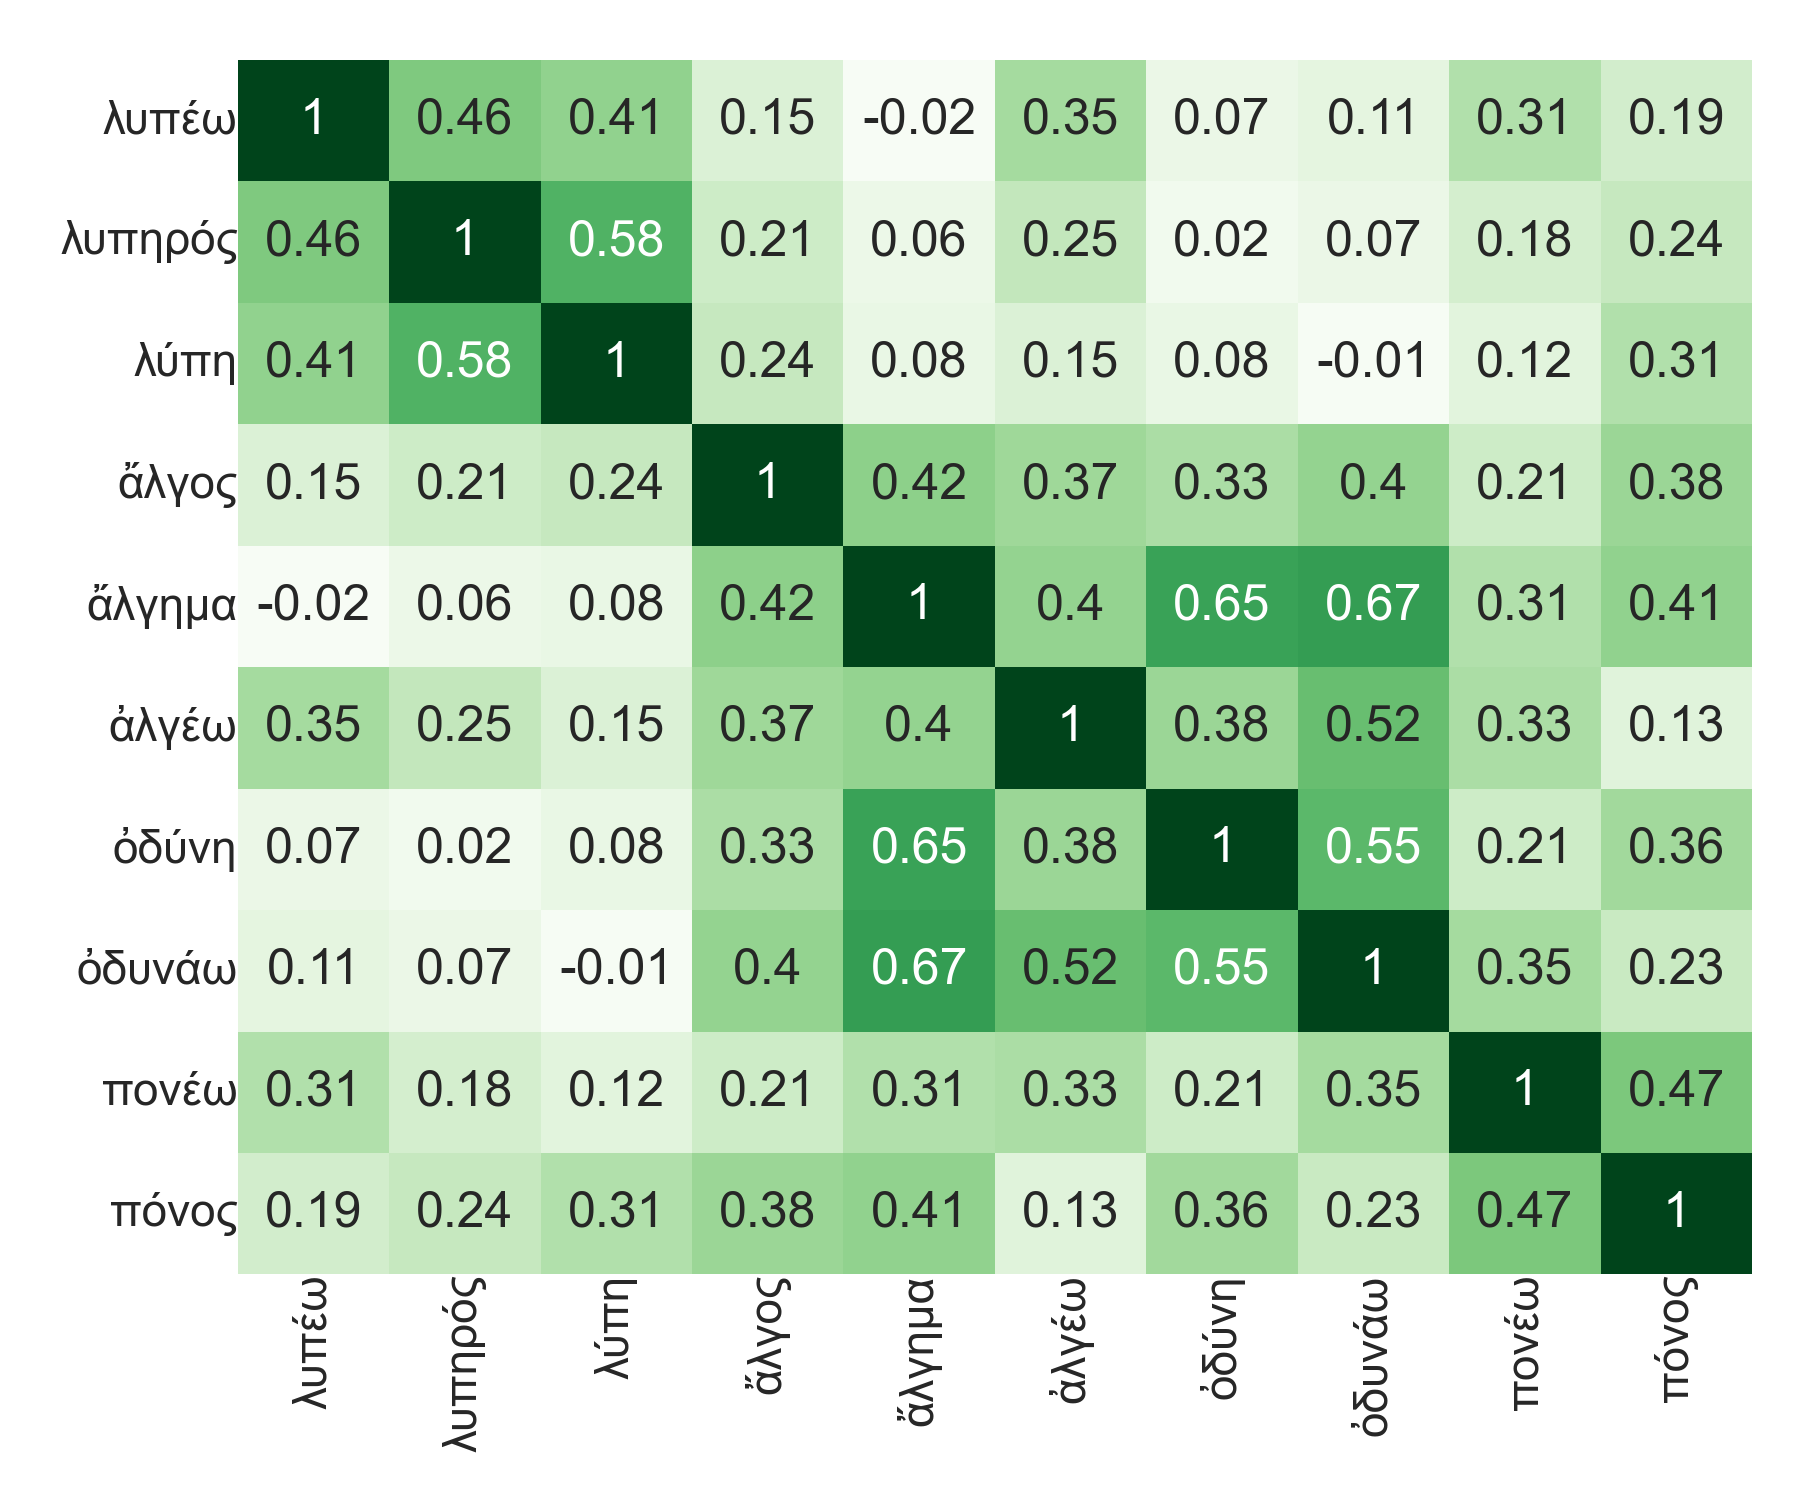

In [109]:
fig, ax = plt.subplots(figsize=(3, 2.5), tight_layout=True)
sns.heatmap(sim_matrices_dict["sim_matrix_full"], annot=True, annot_kws={"fontsize": 6}, cbar=None, cmap="Greens", fmt='g', ax=ax)
ax.set_ylabel("")
ax.set_xlabel("")
ax.tick_params(axis='x', rotation=90, pad=-6, size=6)
ax.tick_params(axis='y', pad=-6, size=6)
plt.show()

In [110]:
save_figure(fig, "similarity_matrix")

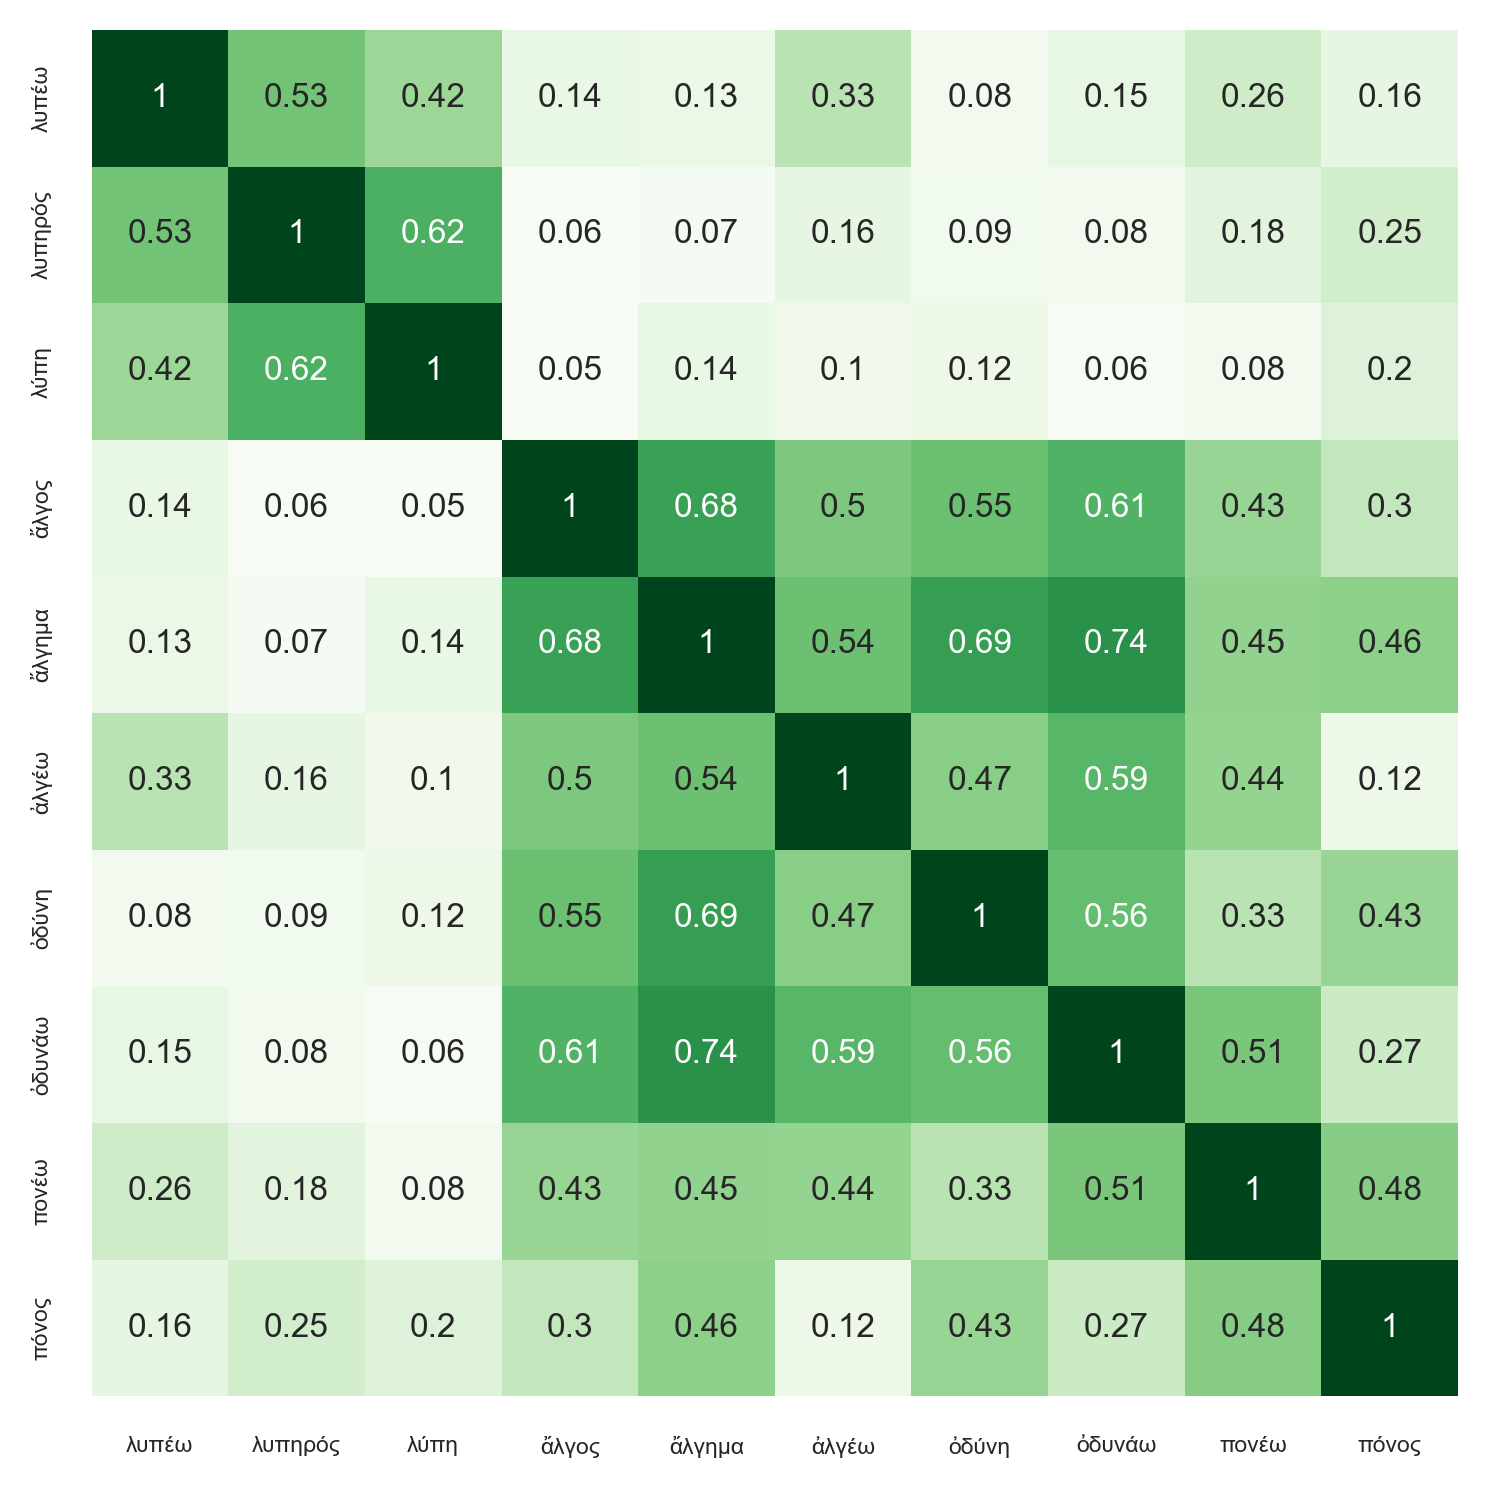

In [99]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300, tight_layout=True)
sns.heatmap(sim_matrices_dict["sim_matrix_subcorpora"], annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

In [100]:
included = ['sim_matrix_full', 'sim_matrix_excl_subcorpora', 'sim_matrix_excl_aristplato', 'sim_matrix_excl_arist', 'sim_matrix_excl_hipp', 'sim_matrix_excl_plato']

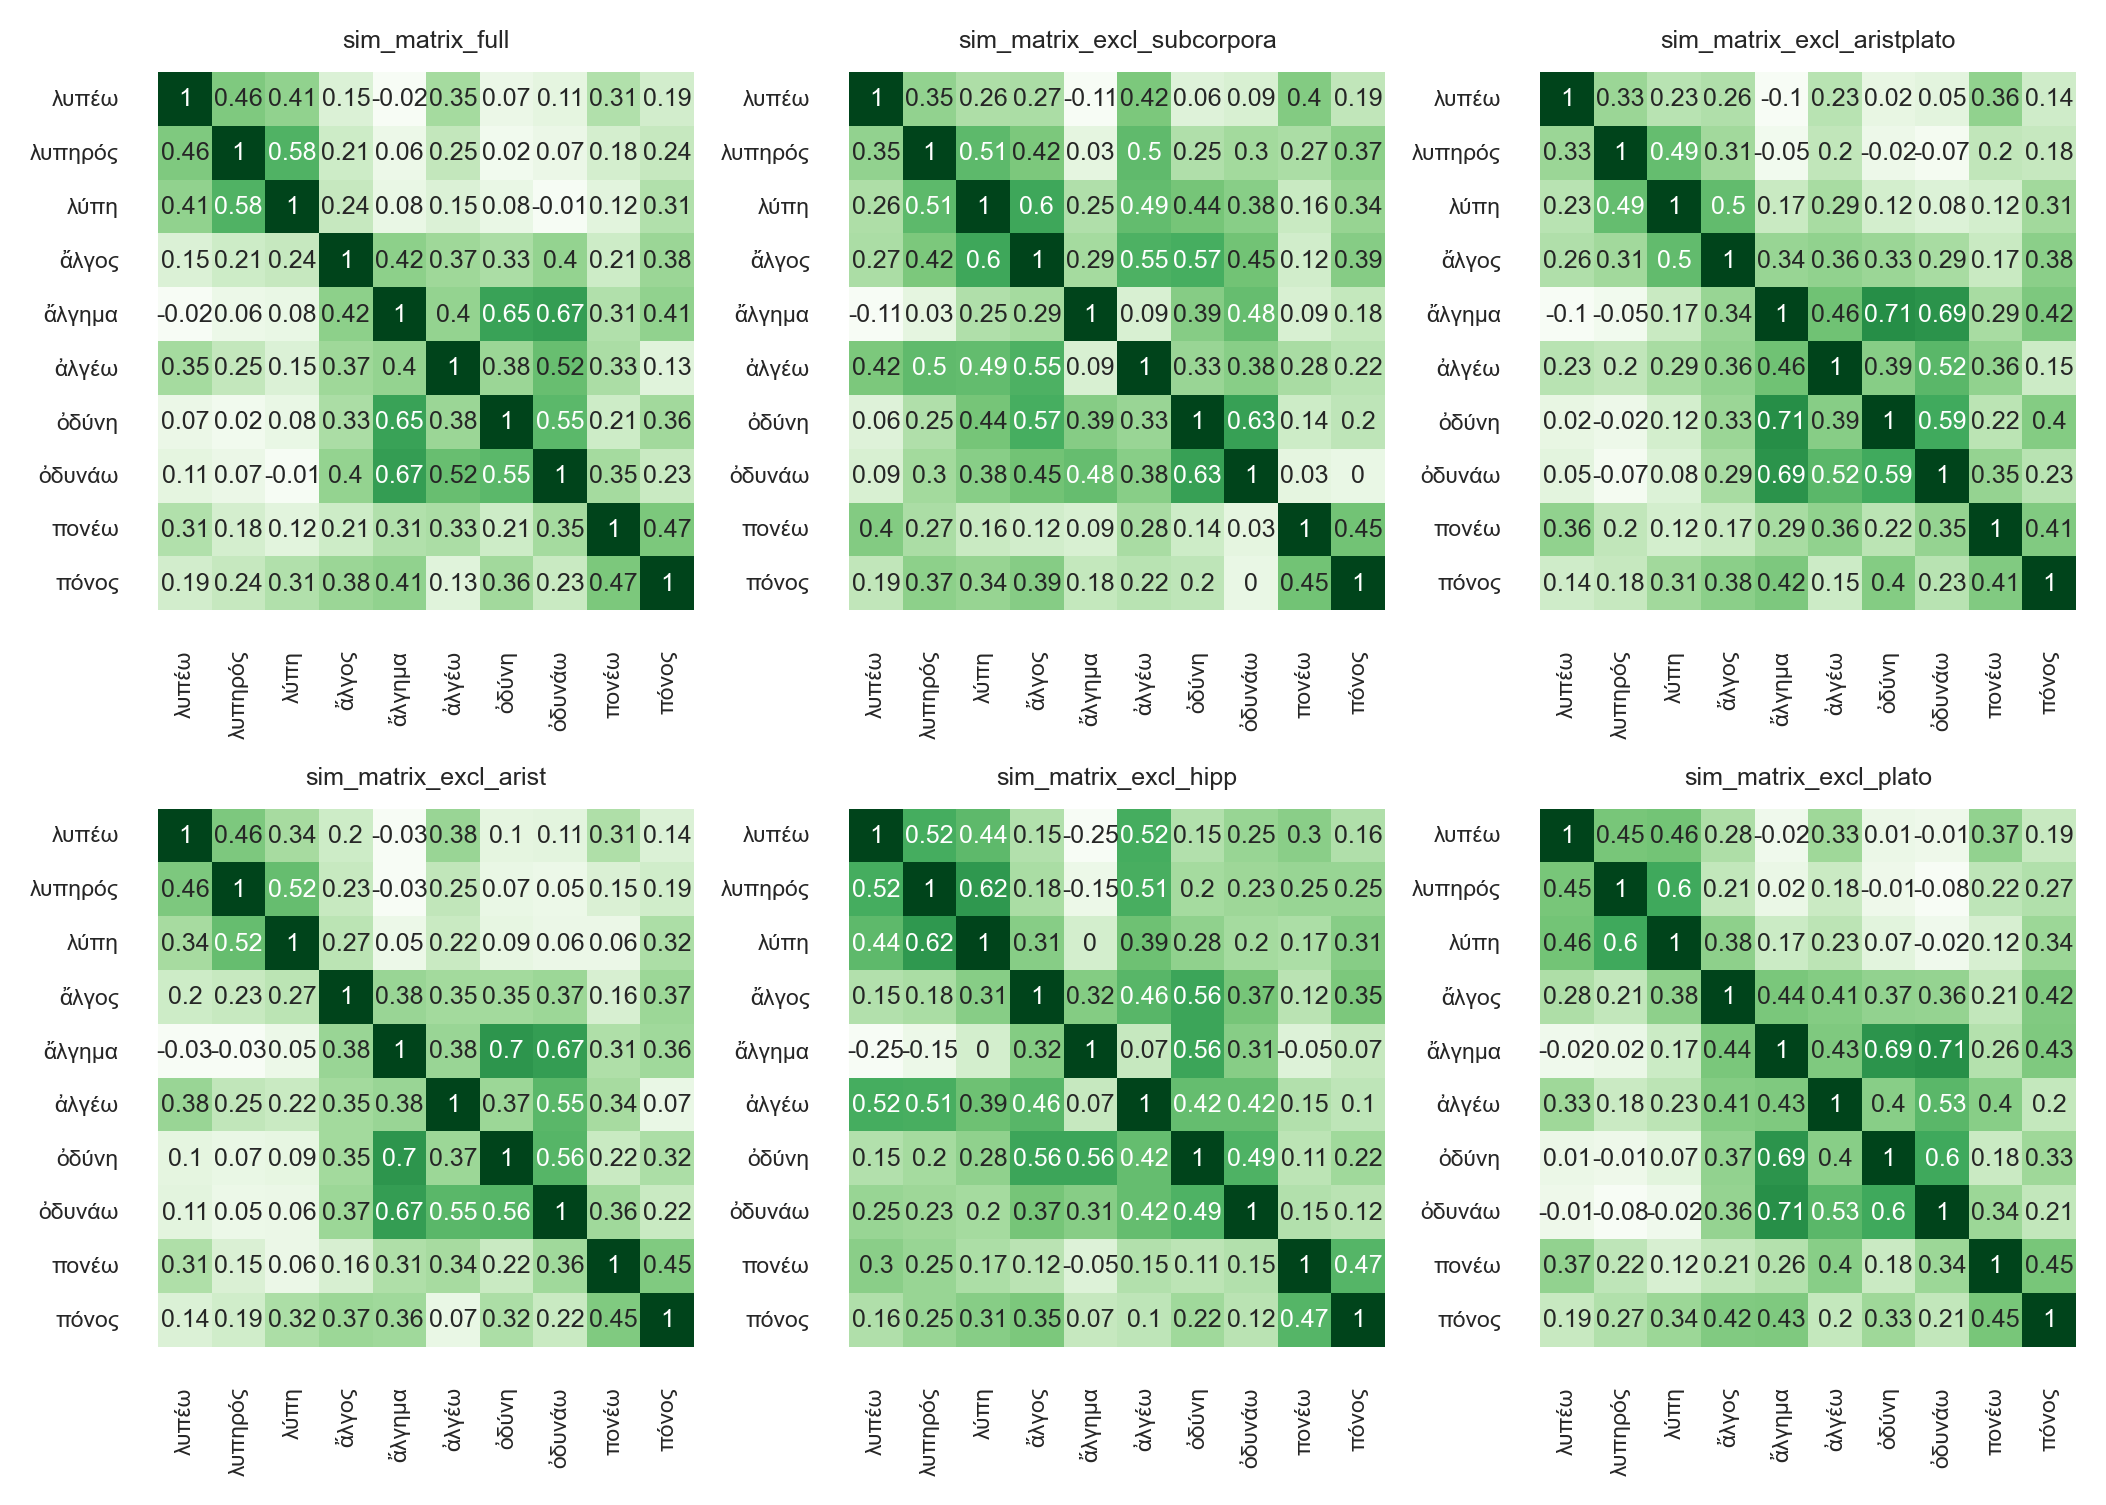

In [101]:
sns.set(font_scale=0.5)
fig, axs = plt.subplots(2,3, figsize=(7, 5), dpi=300, tight_layout=True)
for sim_matrix_title, ax in zip(included, axs.ravel()):
    sim_matrix = sim_matrices_dict[sim_matrix_title]
    sns.heatmap(sim_matrix, annot=True, cbar=None, cmap="Greens", fmt='g', ax=ax)
    ax.set_title(sim_matrix_title)
    ax.set_ylabel("")
    ax.set_xlabel("")
    #plt.show()

In [102]:
save_figure(fig, "sim_matrices_all")

In [58]:
sim_diff_excl_arist = (sim_matrices_dict["sim_matrix_excl_arist"] - sim_matrices_dict["sim_matrix_full"]).apply(abs).round(2)
sim_diff_excl_arist

,λυπέω,λυπηρός,λύπη,ἄλγος,ἄλγημα,ἀλγέω,ὀδύνη,ὀδυνάω,πονέω,πόνος
λυπέω,0.00,0.00,0.07,0.05,0.01,0.03,0.03,0.00,0.00,0.05
λυπηρός,0.00,0.00,0.06,0.02,0.09,0.00,0.05,0.02,0.03,0.05
λύπη,0.07,0.06,0.00,0.03,0.03,0.07,0.01,0.07,0.06,0.01
ἄλγος,0.05,0.02,0.03,0.00,0.04,0.02,0.02,0.03,0.05,0.01
ἄλγημα,0.01,0.09,0.03,0.04,0.00,0.02,0.05,0.00,0.00,0.05
ἀλγέω,0.03,0.00,0.07,0.02,0.02,0.00,0.01,0.03,0.01,0.06
ὀδύνη,0.03,0.05,0.01,0.02,0.05,0.01,0.00,0.01,0.01,0.04
ὀδυνάω,0.00,0.02,0.07,0.03,0.00,0.03,0.01,0.00,0.01,0.01
πονέω,0.00,0.03,0.06,0.05,0.00,0.01,0.01,0.01,0.00,0.02
πόνος,0.05,0.05,0.01,0.01,0.05,0.06,0.04,0.01,0.02,0.00


[Text(0, 0.5, ''),
 Text(0, 1.5, ''),
 Text(0, 2.5, ''),
 Text(0, 3.5, ''),
 Text(0, 4.5, ''),
 Text(0, 5.5, ''),
 Text(0, 6.5, ''),
 Text(0, 7.5, ''),
 Text(0, 8.5, ''),
 Text(0, 9.5, '')]

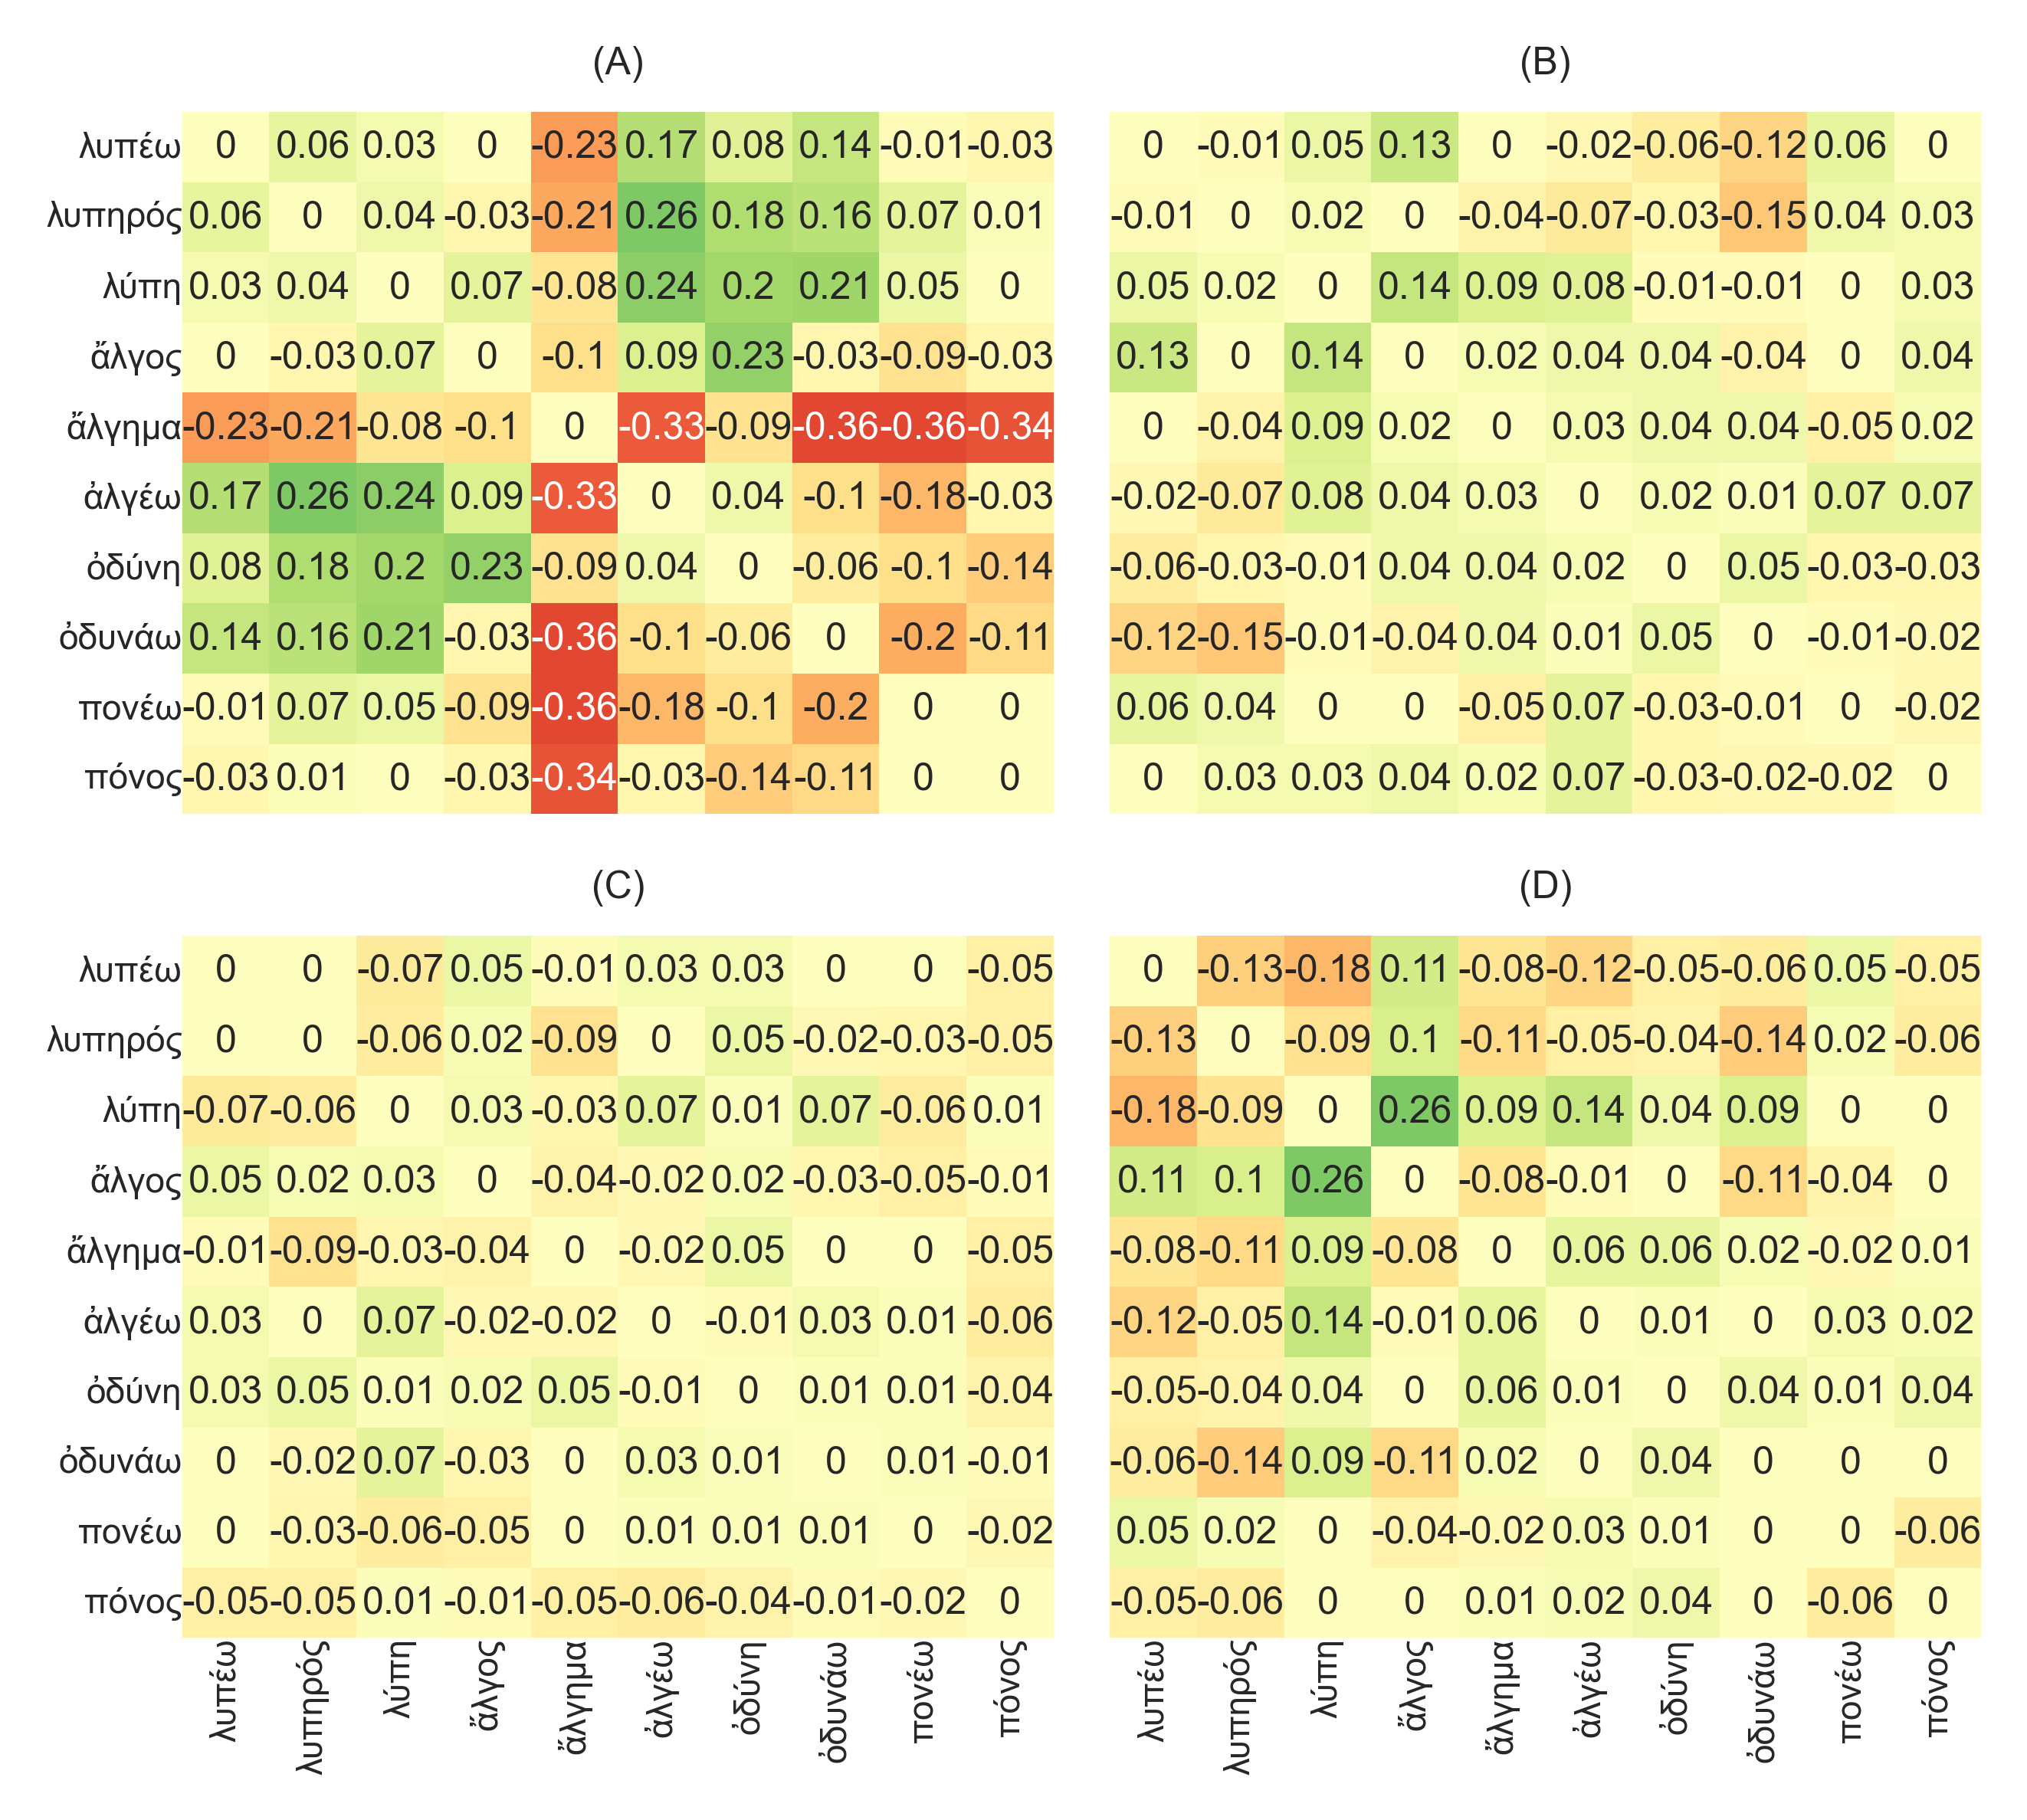

In [92]:
fig, axs = plt.subplots(2, 2, figsize=(4.45, 4), dpi=600, tight_layout=True)

labels = ["(A)", "(B)", "(C)", "(D)"]
matrix_titles = ["sim_matrix_excl_hipp", "sim_matrix_excl_plato", "sim_matrix_excl_arist", "sim_matrix_excl_aristplato"]
for sim_matrix_title, ax, label in zip(matrix_titles, axs.ravel(), labels):
    sim_matrix = sim_matrices_dict[sim_matrix_title]
    sim_diff_excl = (sim_matrix - sim_matrices_dict["sim_matrix_full"]).round(2)
    sns.heatmap(sim_diff_excl, annot=True, annot_kws={"fontsize": 6}, cbar=None, cmap="RdYlGn", vmin=-0.5, vmax=0.5,fmt='g', ax=ax)
    ax.set_title(label)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.tick_params(axis='both', pad=-6, size=6)

axs[0][0].set_xticklabels([])
axs[0][1].set_xticklabels([])
axs[0][1].set_yticklabels([])
axs[1][1].set_yticklabels([])

In [93]:
save_figure(fig, "painwords_differences")

# Comparing all-vector similarities

In [22]:
for fn in ["keyed_vectors_full.wv", "keyed_vectors_excl_arist.wv", "keyed_vectors_excl_plato.wv", "keyed_vectors_excl_hipp.wv"]:
    keyed_vectors = KeyedVectors.load("../data/" + fn)

In [23]:
keyed_vectors_full = KeyedVectors.load("../data/keyed_vectors_full.wv")
keyed_vectors_excl_arist = KeyedVectors.load("../data/keyed_vectors_excl_arist.wv")
keyed_vectors_excl_plato = KeyedVectors.load("../data/keyed_vectors_excl_plato.wv")
keyed_vectors_excl_hipp = KeyedVectors.load("../data/keyed_vectors_excl_hipp.wv")
vectors_list = [keyed_vectors_full, keyed_vectors_excl_arist, keyed_vectors_excl_plato, keyed_vectors_excl_hipp]

In [42]:
complete_sim_matrices = {}
for item in vectors_dict.items():
    complete_sim_matrix = cosine_similarity(item[1].vectors)
    complete_sim_matrices[item[0].replace("keyed_vectors_", "")] = complete_sim_matrix

In [44]:
complete_sim_matrices.keys()

dict_keys(['full', 'excl_arist', 'excl_aristplato', 'excl_subcorpora', 'subcorpora', 'excl_hipp', 'excl_plato'])

In [54]:
full_aristplato_absdiff_sums = np.absolute(np.subtract(complete_sim_matrices["full"], complete_sim_matrices["excl_aristplato"]).round(4)).sum(axis=1)
full_arist_absdiff_sums = np.absolute(np.subtract(complete_sim_matrices["full"], complete_sim_matrices["excl_arist"]).round(4)).sum(axis=1)
full_plato_absdiff_sums = np.absolute(np.subtract(complete_sim_matrices["full"], complete_sim_matrices["excl_plato"]).round(4)).sum(axis=1)
full_hipp_absdiff_sums = np.absolute(np.subtract(complete_sim_matrices["full"], complete_sim_matrices["excl_hipp"]).round(4)).sum(axis=1)

In [56]:
# n of words with their meaning most significantly affected by exclusion of Aristotle and Plato
n = 100
[(vectors_dict["keyed_vectors_full"].index_to_key[tup[0]], tup[1]) for tup in sorted(enumerate(full_aristplato_absdiff_sums), key=lambda x:x[1], reverse=True)][:n]

[('Παρμενίδης', 900.28937),
 ('ἠθικός', 831.7625),
 ('Πρώταρχος', 829.0637),
 ('ἀντίκειμαι', 820.0521),
 ('Πῶλος', 805.12085),
 ('ἐπαινετός', 803.7437),
 ('προσχράω', 802.516),
 ('διαλεκτικός', 800.91113),
 ('ἀντίφασις', 799.39777),
 ('Κτήσιππος', 796.7766),
 ('θεωρητικός', 795.87036),
 ('μονάς', 790.9072),
 ('χρηματιστικός', 790.34753),
 ('πρακτός', 782.24915),
 ('Σιμμίας', 780.2376),
 ('βράγχιον', 774.7297),
 ('ποιός', 772.12195),
 ('συμπέρασμα', 766.8955),
 ('Κέβης', 763.3532),
 ('ὀρθότης', 760.7187),
 ('ἐνεργέω', 757.87573),
 ('Φαῖδρος', 752.3418),
 ('ὁρισμός', 742.49805),
 ('Ἔρως', 738.957),
 ('ἄγνωστος', 727.76025),
 ('ἐπαίω', 722.6898),
 ('μέθοδος', 714.6064),
 ('ἄφθαρτος', 713.7876),
 ('ποιότης', 708.92896),
 ('ἁπτός', 705.4662),
 ('πτῶσις', 703.5869),
 ('νομοφύλαξ', 701.4689),
 ('ζῳοτόκος', 694.9718),
 ('φάντασμα', 694.05725),
 ('δίπους', 693.7658),
 ('ἐφαρμόζω', 693.5721),
 ('τριάς', 689.6382),
 ('σκυτοτόμος', 679.1289),
 ('ἀναθυμίασις', 677.21484),
 ('συζάω', 675.6459),
 ('ἀ

In [51]:
# n of words with their meaning most significantly affected by exclusion of Aristotle
n = 100
[(vectors_dict["keyed_vectors_full"].index_to_key[tup[0]], tup[1]) for tup in sorted(enumerate(full_arist_absdiff_sums), key=lambda x:x[1], reverse=True)][:n]

[('ἀντίκειμαι', 789.99426),
 ('ἠθικός', 775.4143),
 ('πρακτός', 754.3089),
 ('μεσότης', 753.40356),
 ('βράγχιον', 747.1899),
 ('ἀντίφασις', 701.5315),
 ('ἐπιστητός', 699.85254),
 ('ἐφαρμόζω', 699.48975),
 ('ὁρισμός', 694.557),
 ('ἐνεργέω', 667.23425),
 ('ζῳοτόκος', 662.0913),
 ('πτῶσις', 660.14575),
 ('ἄφθαρτος', 641.451),
 ('στιγμή', 626.73926),
 ('ἔνστασις', 621.6515),
 ('ἀντιστρέφω', 616.35266),
 ('ποσός', 612.7389),
 ('συμπέρασμα', 604.8902),
 ('ἀνασκευάζω', 584.60986),
 ('πρόβλημα', 583.5867),
 ('ποιότης', 582.5942),
 ('ἐπαινετός', 569.6222),
 ('συζάω', 558.851),
 ('συμβεβηκός', 551.0022),
 ('στέρησις', 544.2178),
 ('ἐνυπάρχω', 541.2484),
 ('χωριστός', 534.2356),
 ('ἀναθυμίασις', 532.7761),
 ('ὀχεία', 528.11926),
 ('ἀνάλογος', 526.7318),
 ('μίξις', 522.5806),
 ('πρακτικός', 519.9444),
 ('δεκτικός', 517.92944),
 ('ἀδιαίρετος', 517.5709),
 ('γεῦσις', 517.14685),
 ('ἔντομος', 510.09448),
 ('θρεπτικός', 506.9578),
 ('μονάς', 503.9576),
 ('ἐπαγωγή', 501.522),
 ('ἐπιζητέω', 500.38553),


In [29]:
# n of words with their meaning most significantly affected by exclusion of Plato
n = 100
[(keyed_vectors_full.index_to_key[tup[0]], tup[1]) for tup in sorted(enumerate(full_plato_absdiff_sums), key=lambda x:x[1], reverse=True)][:n]

[('Φαῖδρος', 719.0823),
 ('Ἔρως', 697.21716),
 ('Πῶλος', 694.1955),
 ('Κέβης', 688.75305),
 ('Κτήσιππος', 687.3594),
 ('Σιμμίας', 673.8013),
 ('Πρώταρχος', 670.97705),
 ('ἐπονομάζω', 527.07587),
 ('Θεαίτητος', 509.43982),
 ('πειθώ', 472.7054),
 ('ἐφάπτω', 468.6832),
 ('Παρμενίδης', 464.4056),
 ('ἀπεικάζω', 461.23383),
 ('Κλεινίας', 444.4493),
 ('προσλέγω', 423.2698),
 ('κομψός', 420.6741),
 ('Καλλικλῆς', 420.4099),
 ('ἀνευρίσκω', 420.3903),
 ('Δίων', 417.284),
 ('συνέπομαι', 414.3379),
 ('Γοργίας', 413.9253),
 ('Θεόδωρος', 410.8352),
 ('κατάδηλος', 409.9587),
 ('συνδέω', 409.7318),
 ('νομοφύλαξ', 395.4181),
 ('γεύω', 395.0548),
 ('ῥητορική', 391.87122),
 ('Θρασύμαχος', 391.68323),
 ('σύμφημι', 390.4448),
 ('ἀγέλη', 388.4635),
 ('ἔμφρων', 379.8616),
 ('Διονυσόδωρος', 376.69342),
 ('λύρα', 375.5451),
 ('ἀναφαίνω', 374.5664),
 ('Ἑρμογένης', 372.5254),
 ('κατοράω', 371.4179),
 ('Μένων', 370.61993),
 ('Ἀδείμαντος', 368.96948),
 ('Πρόδικος', 366.7807),
 ('Λάχης', 366.2345),
 ('Μέλητος', 365.

In [59]:
# n of words with their meaning most significantly affected by exclusion of Hippocrates
n = 100
[(vectors_dict["keyed_vectors_full"].index_to_key[tup[0]], tup[1]) for tup in sorted(enumerate(full_hipp_absdiff_sums), key=lambda x:x[1], reverse=True)][:n]


[('χλιερός', 767.62573),
 ('διαχωρητικός', 736.02344),
 ('τρομώδης', 681.7225),
 ('λινοζῶστις', 672.2013),
 ('ὀδυνώδης', 655.93396),
 ('νέτωπον', 645.71875),
 ('σπασμώδης', 640.1763),
 ('ὀλέθριος', 639.1188),
 ('ὑποστροφή', 633.65173),
 ('πουλλός', 626.1896),
 ('κατάτασις', 614.6317),
 ('διψώδης', 612.7696),
 ('ὑποθυμιάω', 592.08),
 ('θέρμη', 576.95374),
 ('ἄλητον', 576.55994),
 ('οὖρον', 574.255),
 ('περιπλευμονία', 573.027),
 ('αὔτεος', 572.0779),
 ('τούτεον', 568.8782),
 ('αἱμορραγέω', 564.1807),
 ('φρενιτικός', 558.4421),
 ('ῥόδινος', 554.3459),
 ('κωματώδης', 551.5083),
 ('ἤρ', 547.683),
 ('πυρεταίνω', 544.73334),
 ('καταπλάσσω', 544.2178),
 ('καυσώδης', 540.146),
 ('πτύω', 534.7651),
 ('βληχρός', 531.6731),
 ('ἀσώδης', 530.6793),
 ('ἐπιμήνιος', 530.4217),
 ('Ὁκότης', 529.8264),
 ('αἱμορραγία', 526.7011),
 ('ὁδοιπορέω', 526.29663),
 ('σίαλον', 524.1443),
 ('προσθετός', 521.08496),
 ('ὕδρωψ', 513.43097),
 ('ἀρχός', 510.4554),
 ('καῦσος', 510.4187),
 ('ἑψέω', 507.98492),
 ('πτισάνη'